In [4]:
import pandas as pd
import numpy as np
from scipy import stats
%pylab inline

Yauyos = pd.read_csv('Precip_Est_Yauyos.csv', index_col=0, parse_dates=True)

Populating the interactive namespace from numpy and matplotlib


<AxesSubplot:>

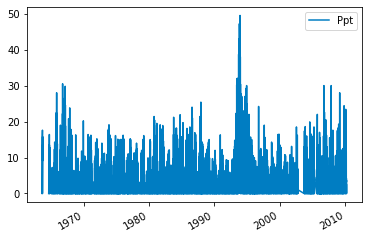

In [5]:
Yauyos.plot(color='#007dc2')

array([[<AxesSubplot:title={'center':'Ppt'}>]], dtype=object)

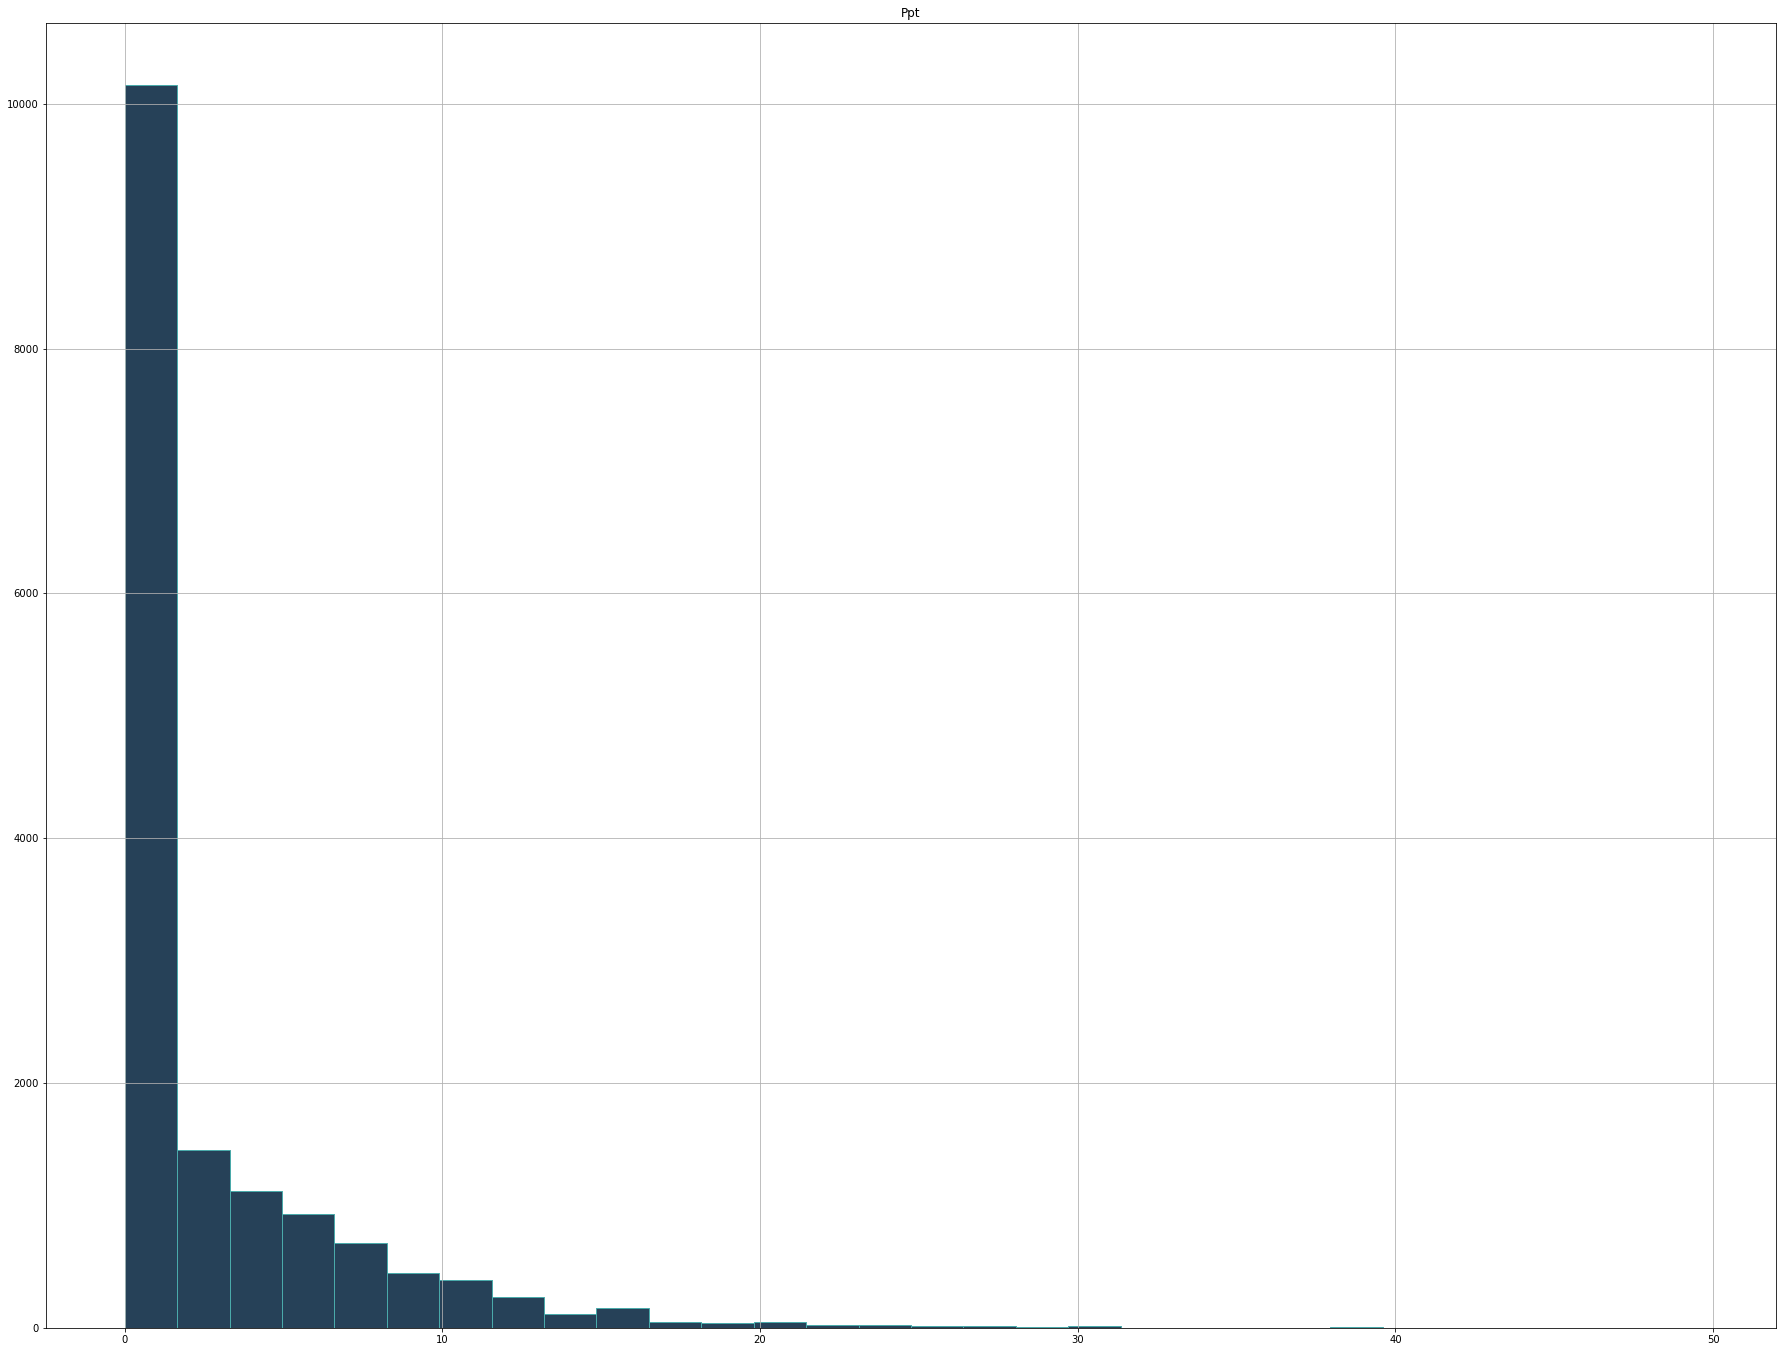

In [20]:
Yauyos.hist(bins=30, edgecolor='#4aaaaa', color='#264158')

#Todos los datos

array([[<AxesSubplot:title={'center':'Ppt'}>]], dtype=object)

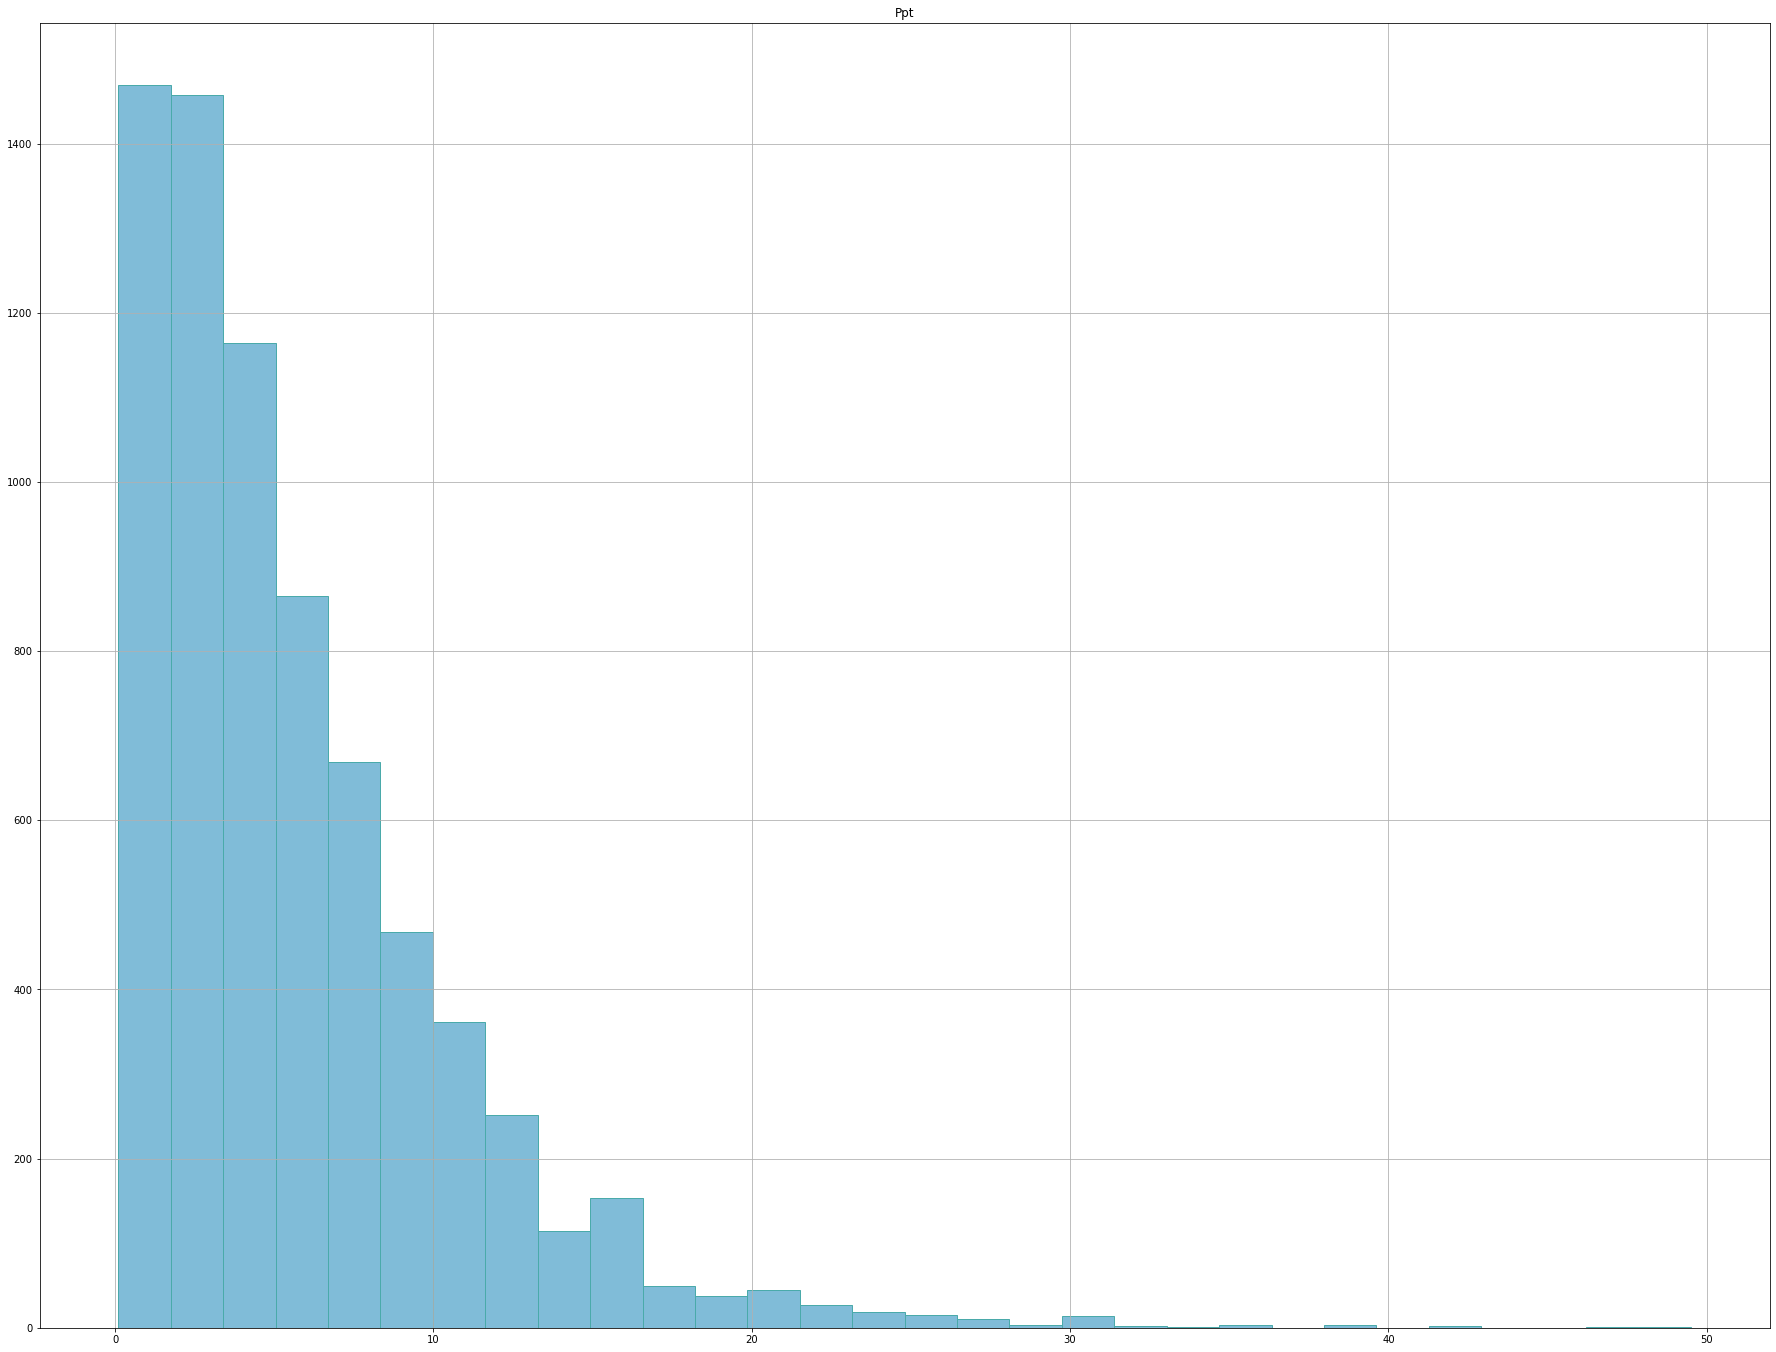

In [21]:
Yauyos[Yauyos>0].hist(bins=30, edgecolor='#4aaaaa', color='#80BCD8')

#Precipitacion mayor a 0

array([[<AxesSubplot:title={'center':'Ppt'}>]], dtype=object)

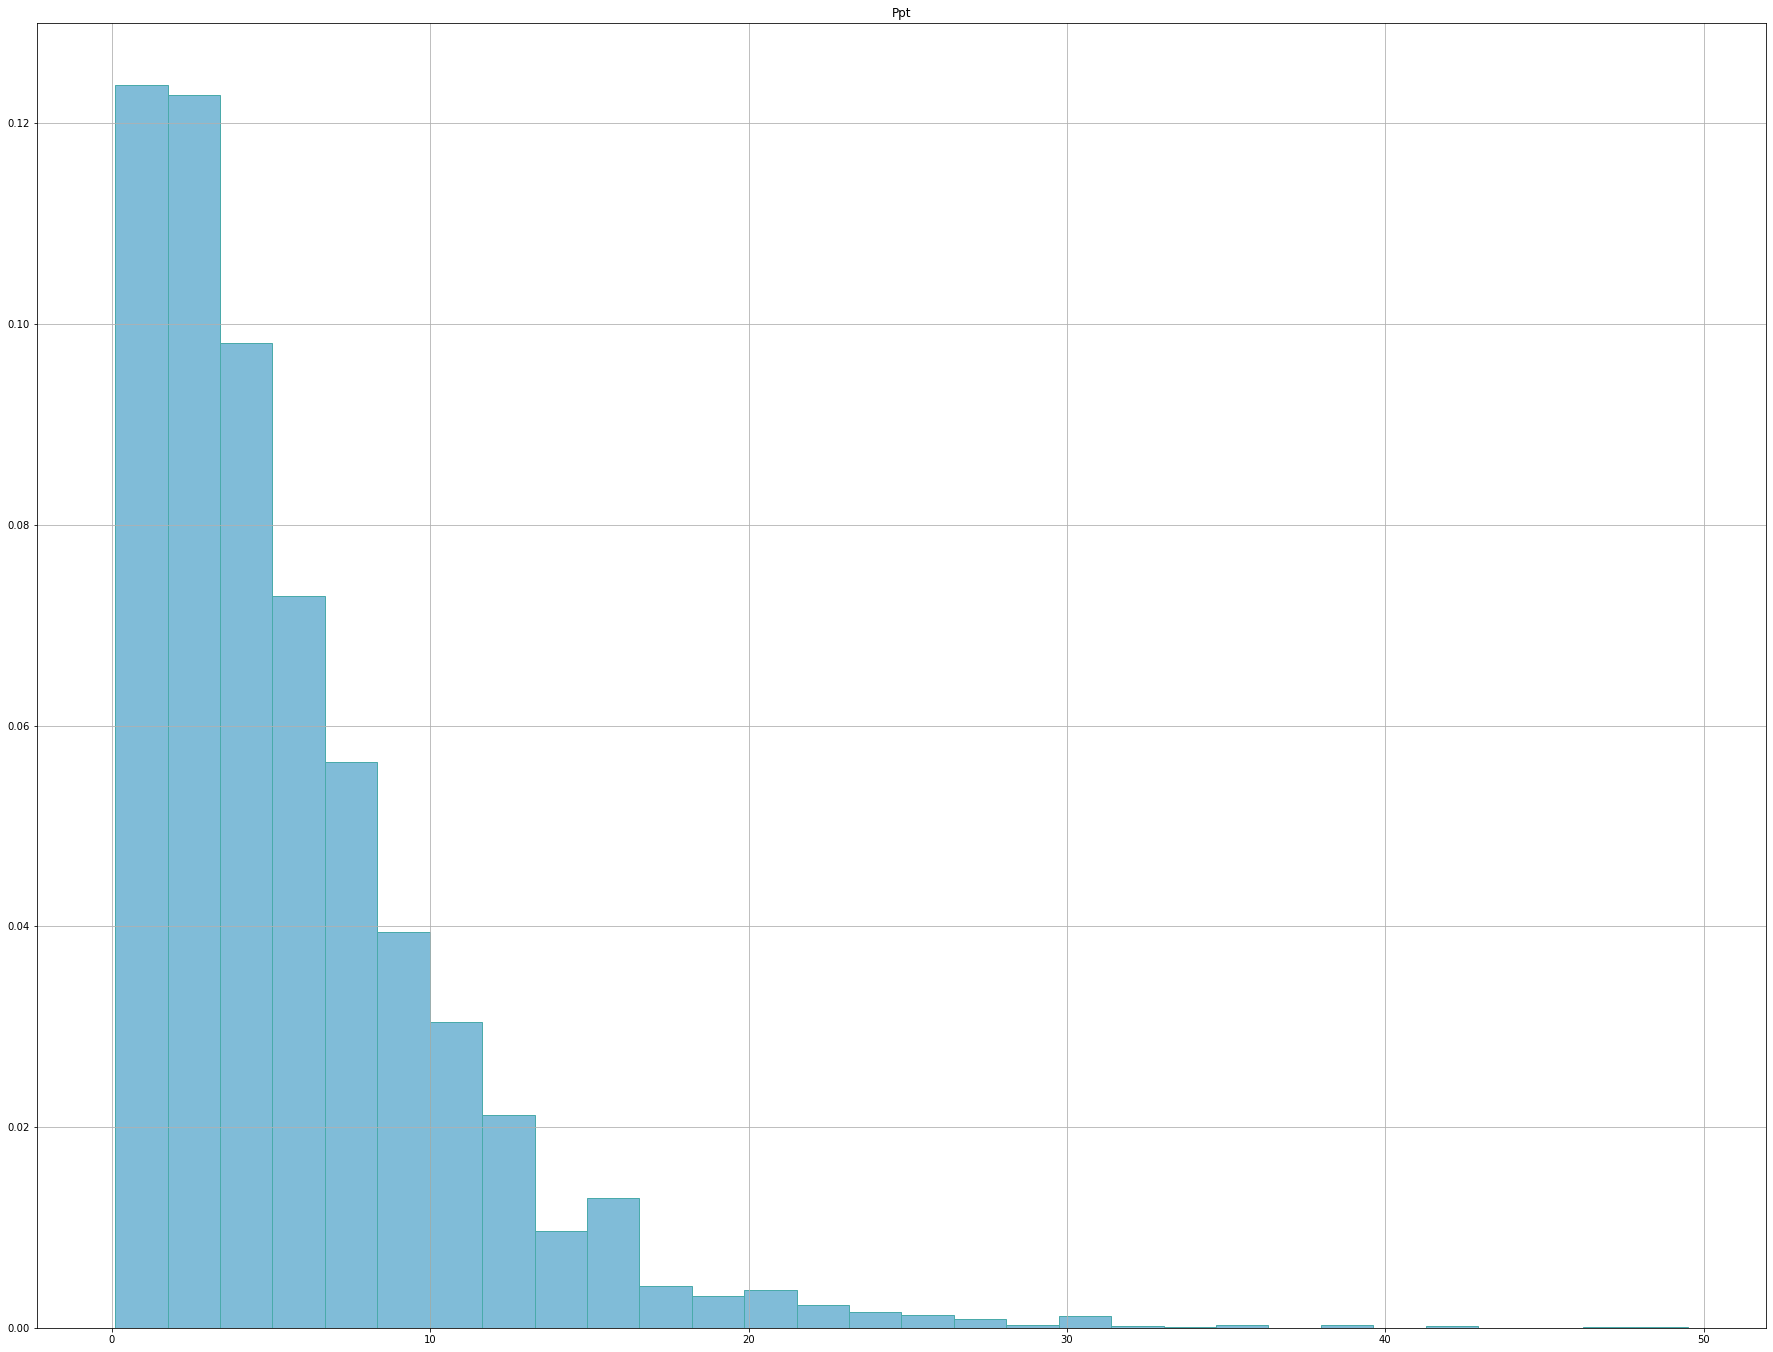

In [23]:
Yauyos[Yauyos>0].hist(bins=30, density=True, edgecolor='#4aaaaa', color='#80BCD8')

#función de densidad de probabilidad con el histograma, por lo que el valor máximo debería ser 1

In [11]:
#hallamos el promedio y la desviación
promedio = Yauyos[Yauyos>0].mean()
desviacion = Yauyos[Yauyos>0].std()
print(promedio, desviacion)

Ppt    5.589663
dtype: float64 Ppt    4.965991
dtype: float64


In [12]:
#determinamos las regresiones estadisticas
tabulaciones = np.arange(-40,51,0.1)
distnormal = stats.norm.pdf(tabulaciones, 
                            loc=promedio, scale=desviacion)
distlognormal = stats.pearson3.pdf(tabulaciones,skew=1,
                                   loc=promedio, scale=desviacion)
distweibull = stats.dweibull.pdf(tabulaciones,c=1,
                                   loc=promedio, scale=desviacion)
distchi2 = stats.chi2.pdf(tabulaciones,df=2,
                                   loc=promedio, scale=desviacion)

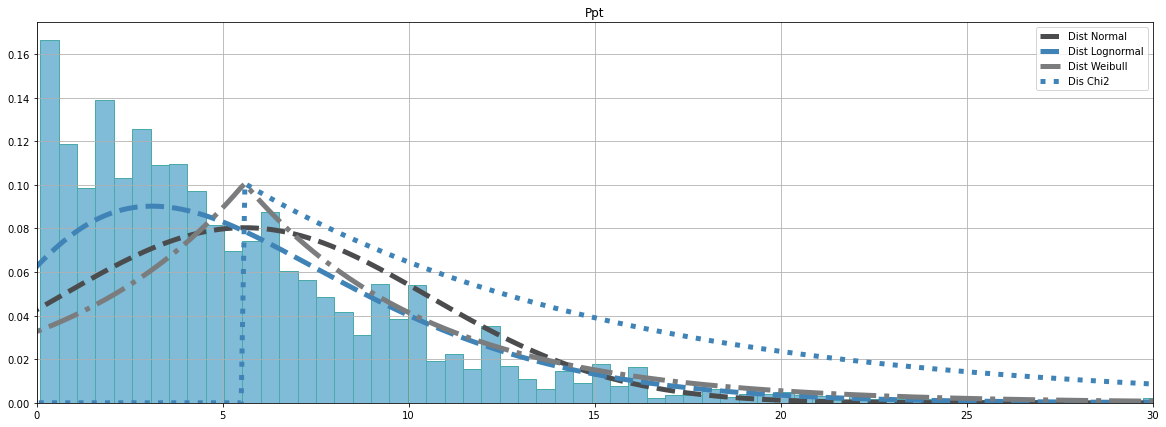

In [29]:
#ploteamos los datos
Yauyos[Yauyos>0].hist(bins=100, density=True, edgecolor='#4aaaaa', color='#80BCD8')
plot(tabulaciones,distnormal, color='#4B4C4E', linewidth=5, linestyle='--',label='Dist Normal')
plot(tabulaciones,distlognormal, color='#3F83B7', linewidth=5, linestyle='--', label='Dist Lognormal')
plot(tabulaciones,distweibull, color='#7B7C7E', linewidth=5, linestyle='-.', label='Dist Weibull')
plot(tabulaciones,distchi2, color='#3F83B7', linewidth=5, linestyle=':', label='Dis Chi2')
xlim(0,30)
legend(loc='upper right')
figsize(20,7)

#GRAFICA
#Mejor ajuste, distribucion lognormal

In [17]:
#Calculamos las precipitaciones para periodos de retorno de 100 años

In [19]:
#Probabilidad de excedencia 1/100
p100y_norm = stats.norm.ppf([0.99], loc=promedio, scale=desviacion)
p100y_lognorm = stats.pearson3.ppf([0.99], skew=1, loc=promedio, scale=desviacion)
p100y_weibull = stats.dweibull.ppf([0.99], c=1, loc=promedio, scale=desviacion)
p100y_chi2 = stats.chi2.ppf([0.99], df=2, loc=promedio, scale=desviacion)

print( "Precipitación para T=100años Dist Normal =", p100y_norm[0])
print( "Precipitación para T=100años Dist Logormal =", p100y_lognorm[0])
print( "Precipitación para T=100años Dist Weibull =", p100y_weibull[0])
print( "Precipitación para T=100años Dist Chi2 =", p100y_chi2[0])

Precipitación para T=100años Dist Normal = 17.14228458394833
Precipitación para T=100años Dist Logormal = 20.59966131074448
Precipitación para T=100años Dist Weibull = 25.016732436503993
Precipitación para T=100años Dist Chi2 = 51.32812685981857
